In [314]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from util import prep_image

In [316]:
im = cv.imread(prep_image('https://picsum.photos/2000'))
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
if len(im) > 150 or len(im[0]) > 150:
    im = cv.resize(im, (min((150, len(im))), min((150, len(im[0])))))

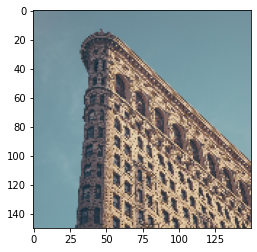

In [317]:
plt.imshow(im)
plt.show()

In [318]:
flatten_im = np.vectorize(int)(im.reshape(-1, im.shape[-1]))
means = [np.array([float(d)*256 for d in v], dtype=float) for v in np.random.rand(7, 3)]
print(means)

[array([ 22.00961091,  23.7619256 , 145.74322494]), array([236.22815152,  82.93401222,  81.41438531]), array([244.95259849, 197.07631631,  16.28176465]), array([249.39745867,  94.69904327,  94.1640419 ]), array([114.51385675, 135.91449072, 208.57080717]), array([125.85891031, 127.70395   ,  66.61677224]), array([111.51049114, 147.52088149,  85.01861881])]


In [319]:
def dist(vec1, vec2):
    return np.linalg.norm(vec1-vec2)

In [320]:
def avg(flat_im):
    return (np.sum(flat_im, axis=0)+np.array([1,1,1])) / (len(flat_im)+1)

In [321]:
def iterate(im, means):
    buckets = [[] for i in range(len(means))]
    for v in im:
        dists = [dist(v, mean) for mean in means]
        buckets[np.argmin(dists)].append(v)
    display_im = []
    for i in range(len(means)):
        new_mean = avg(buckets[i])
        display_im.append(np.vectorize(np.uint8)(new_mean))
        means[i] = new_mean
    plt.imshow(np.array([display_im]))
    plt.show()

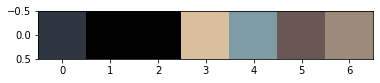

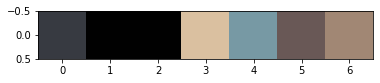

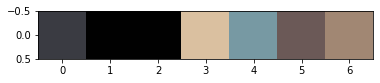

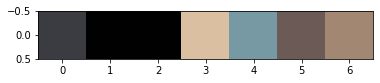

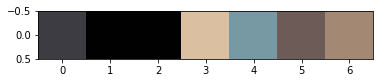

In [322]:
for i in range(5):
    # Repeat the iterations
    iterate(flatten_im, means)

In [323]:
buckets = [[] for i in range(len(means))]
for v in flatten_im:
    dists = [dist(v, mean) for mean in means]
    buckets[np.argmin(dists)].append(v)
buckets.sort(key=len, reverse=True)
rel_pixels = [v for bucket in buckets[:3] for v in bucket]
adjusted_mean = np.vectorize(np.uint8)(avg(rel_pixels))

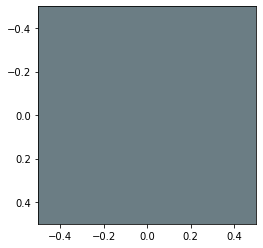

In [324]:
plt.imshow(np.array([[adjusted_mean]]))